<a href="https://colab.research.google.com/github/Rohan20202/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Importing Libraries**

In [1]:
#importing libraries
import string
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mno             #install  pip install missingno
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import date, datetime

**Connecting the drive**

In [2]:
#importing and connecting to the drive storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Loading**

In [3]:
#loading the restaurant reviews dataset
netflix= pd.read_csv('/content/drive/MyDrive/Netflix movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#shape and size of dataset
netflix.shape

(7787, 12)

In [6]:
#columns in the reviews dataset
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Data Cleaning**

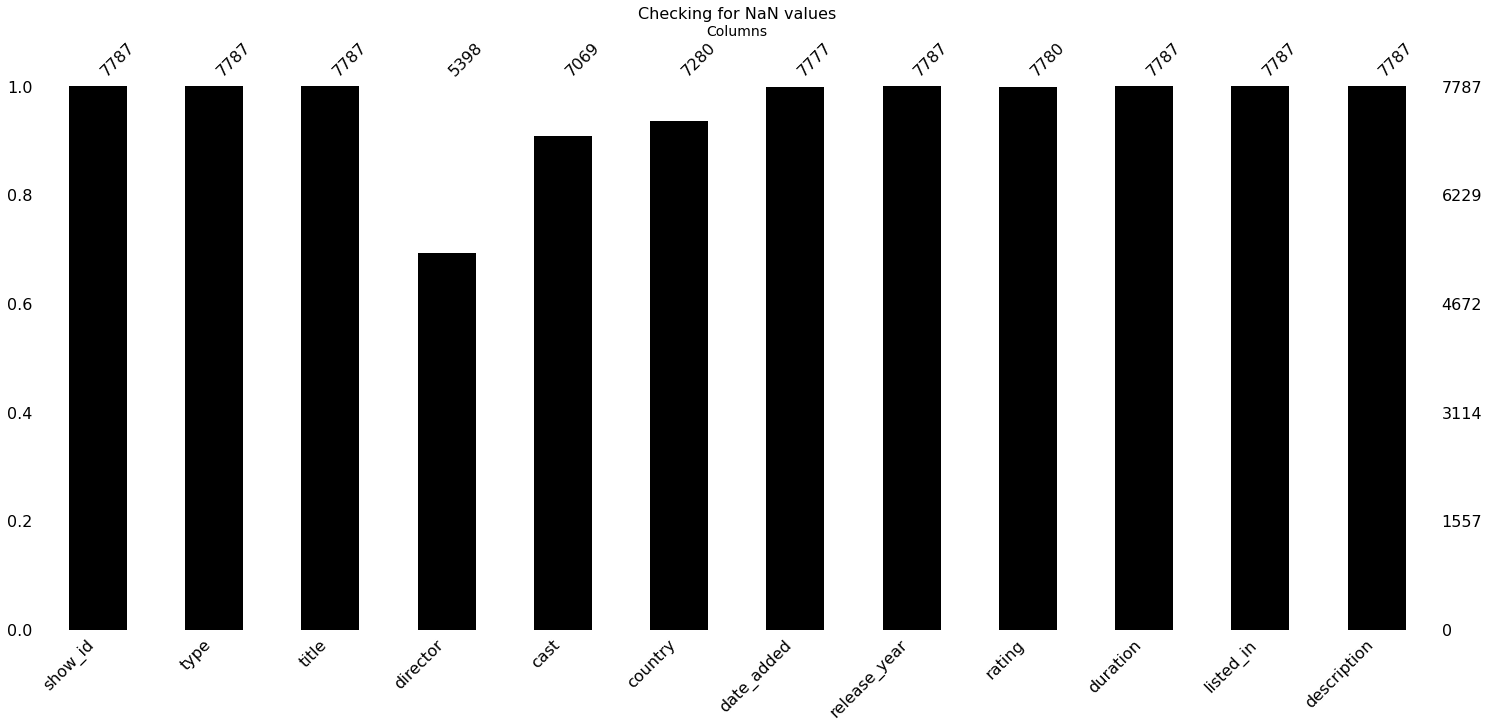

In [10]:
#checking for null values
mno.bar(netflix, color='Black')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [11]:
#dropping the null values
netflix.dropna(inplace=True)

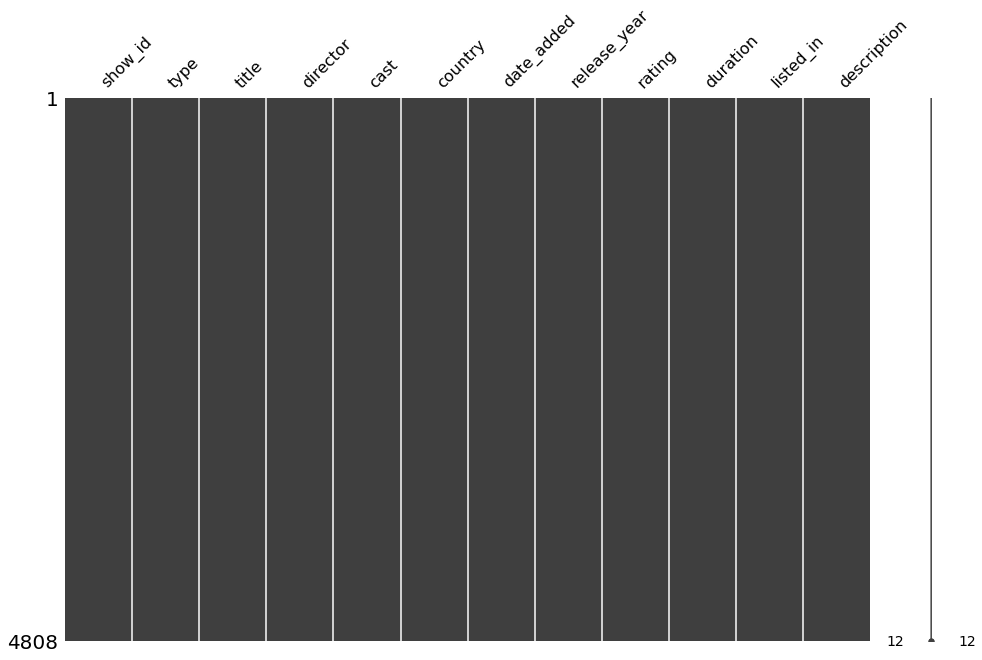

In [13]:
#checking for nan values
mno.matrix(netflix,figsize=(16,10))

In [14]:
netflix.nunique()

show_id         4808
type               2
title           4808
director        3613
cast            4688
country          544
date_added      1291
release_year      71
rating            14
duration         195
listed_in        323
description     4803
dtype: int64

**Convert Date Time format**

In [15]:
netflix['date'] = pd.to_datetime(netflix['date_added'])
netflix['Year'] = netflix['date'].dt.year
netflix['Month'] = netflix['date'].dt.month
netflix['Day'] = netflix['date'].dt.day
netflix['Year'].astype(int);
netflix['Day'].astype(int);

In [16]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,Year,Month,Day
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020,1,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017,7,1


# **1. Data Visualization**

**Number of Movies/Tv shows released (Year wise)**

In [17]:
Year_df=netflix['Year'].value_counts().reset_index()
Year_df.rename(columns={'index': 'Released_year'}, inplace=True)
Year_df.rename(columns={'Year': 'Count'}, inplace=True)
Year_df

,Released_year,Count
0,2019,1337
1,2020,1229
2,2018,1114
3,2017,752
4,2016,207
5,2021,78
6,2015,50
7,2014,14
8,2011,13
9,2013,7


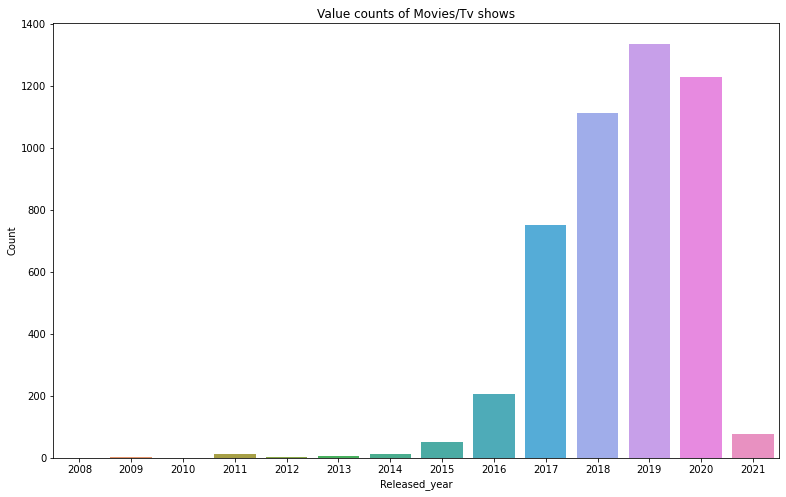

In [18]:
plt.figure(figsize=(13,8))
plt.title('Value counts of Movies/Tv shows')
sns.barplot(x='Released_year',y='Count',data=Year_df)

**Number of Movies/Tv shows released (Month wise)**

In [19]:
month_df=netflix['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Released_Month'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Released_Month,Count
0,10,498
1,1,497
2,12,495
3,11,470
4,3,425
5,7,371
6,4,370
7,8,369
8,9,355
9,6,334


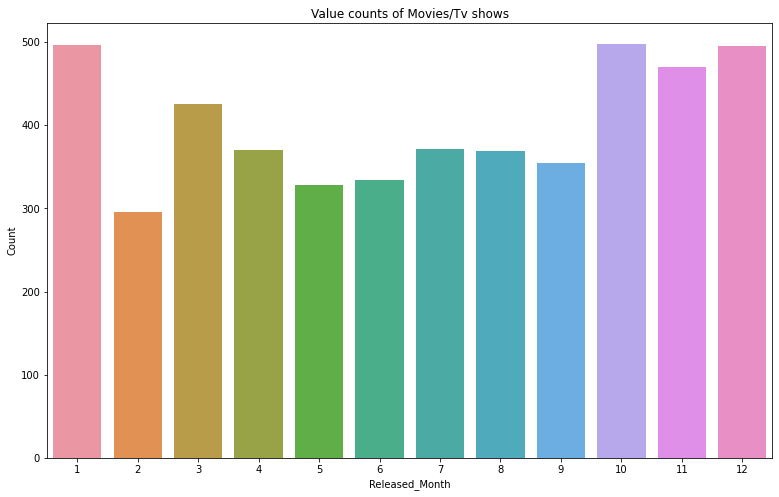

In [20]:
plt.figure(figsize=(13,8))
plt.title('Value counts of Movies/Tv shows')
sns.barplot(x='Released_Month',y='Count',data=month_df)

**Number of Movies/Tv shows released (Date wise)**

In [21]:
Day_df=netflix['Day'].value_counts().reset_index()
Day_df.rename(columns={'index': 'Released_date'}, inplace=True)
Day_df.rename(columns={'Day': 'Count'}, inplace=True)
Day_df

,Released_date,Count
0,1,1396
1,15,391
2,31,168
3,16,155
4,2,148
5,10,134
6,5,134
7,20,132
8,19,131
9,6,113


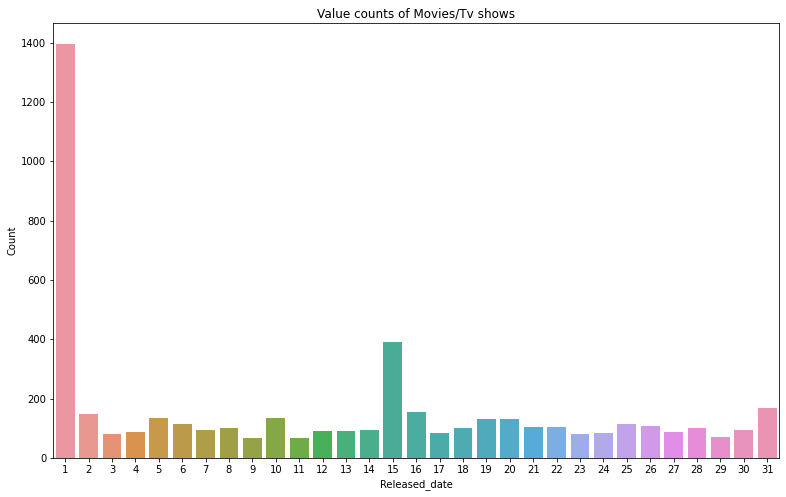

In [22]:
plt.figure(figsize=(13,8))
plt.title('Value counts of Movies/Tv shows')
sns.barplot(x='Released_date',y='Count',data=Day_df)

**Type: Movie and TV Shows**

In [23]:
# Value counts of Rendted bikes on holidays
Type= netflix['type'].value_counts()
Type

Movie      4673
TV Show     135
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f04a93f7cd0>,
 [Text(-0.6317842255148798, -0.9004713723326042, 'Movie'),
  Text(0.6892191436105667, 0.9823324142471922, 'TV Show')],
 [Text(-0.34460957755357075, -0.49116620309051134, '97.2%'),
  Text(0.40204450043949724, 0.5730272416441954, '2.8%')])

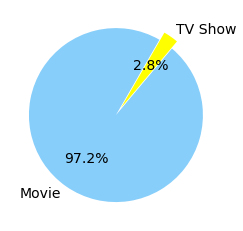

In [24]:
plt.rcParams['figure.figsize'] = 4,4
labels = netflix['type'].value_counts().index.tolist()
sizes = netflix['type'].value_counts().tolist()
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**Rating of shows and movies**

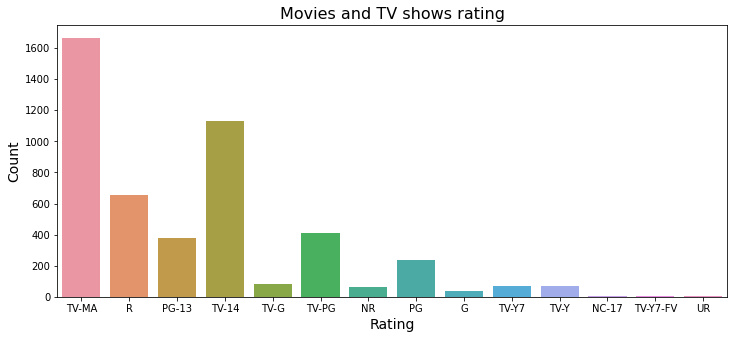

In [25]:
#plotting the value counts of Restaurant ratings
plt.figure(figsize=(12, 5))
sns.countplot(netflix.rating)
plt.title('Movies and TV shows rating', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Top 5 Producer Countries**

In [26]:
country= netflix['country'].value_counts().reset_index()
country.rename(columns={'index' : 'Production_countries'}, inplace= True)
country.rename(columns={'country' : 'count'}, inplace= True)
country.head()

,Production_countries,count
0,United States,1653
1,India,832
2,United Kingdom,174
3,Canada,104
4,Egypt,87


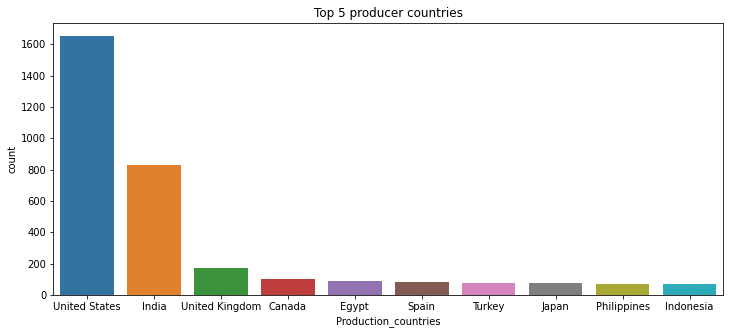

In [27]:
plt.figure(figsize=(12,5))
plt.title('Top 5 producer countries')
sns.barplot(x='Production_countries',y= 'count', data= country[:10])

**value counts movies or tv shows added on netflix**

In [28]:
Date_added= netflix['date_added'].value_counts().reset_index()
Date_added.rename(columns={'index' : 'Date_added'}, inplace= True)
Date_added.rename(columns={'date_added' : 'count'}, inplace= True)
Date_added.head()

,Date_added,count
0,"January 1, 2020",100
1,"November 1, 2019",70
2,"March 1, 2018",67
3,"December 31, 2019",64
4,"October 1, 2018",61


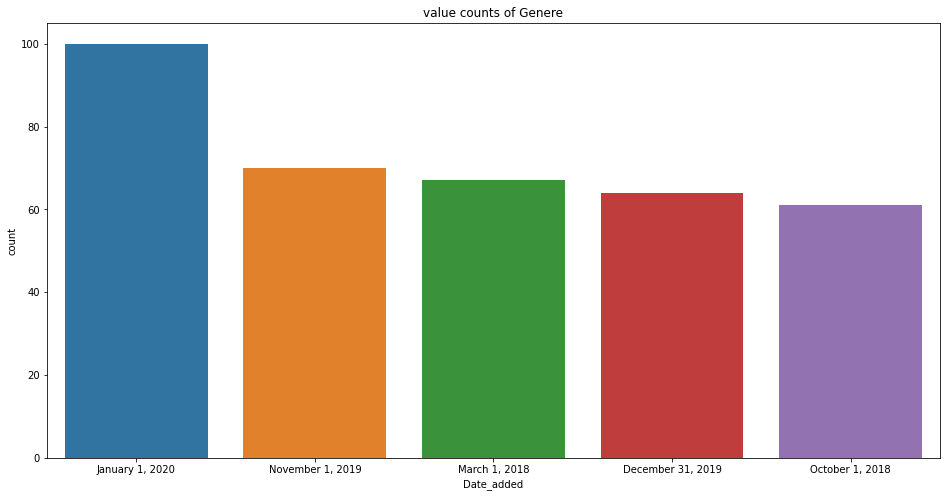

In [29]:
plt.figure(figsize=(16,8))
plt.title('value counts of Genere')
sns.barplot(x='Date_added',y= 'count', data= Date_added[:5])

**value counts of Genere**

In [30]:
Listed_in= netflix['listed_in'].value_counts().reset_index()
Listed_in.rename(columns={'index' : 'Listed_in'}, inplace= True)
Listed_in.rename(columns={'listed_in' : 'count'}, inplace= True)
Listed_in.head()

,Listed_in,count
0,"Dramas, International Movies",306
1,Stand-Up Comedy,276
2,"Comedies, Dramas, International Movies",237
3,"Dramas, Independent Movies, International Movies",213
4,"Children & Family Movies, Comedies",158


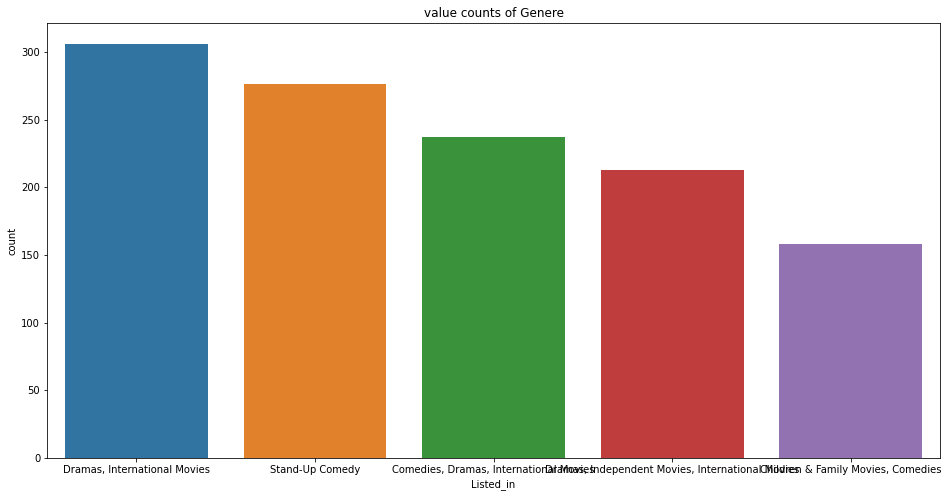

In [31]:
plt.figure(figsize=(16,8))
plt.title('value counts of Genere')
sns.barplot(x='Listed_in',y= 'count', data= Listed_in[:5])

**Value counts of Actors involved in the movie / show**

In [32]:
Cast_name= netflix['cast'].value_counts().reset_index()
Cast_name.rename(columns={'index' : 'Cast_name'}, inplace= True)
Cast_name.rename(columns={'cast' : 'count'}, inplace= True)
Cast_name.head()

,Cast_name,count
0,Samuel West,10
1,Jeff Dunham,7
2,Kevin Hart,6
3,Bill Burr,5
4,Jim Gaffigan,5


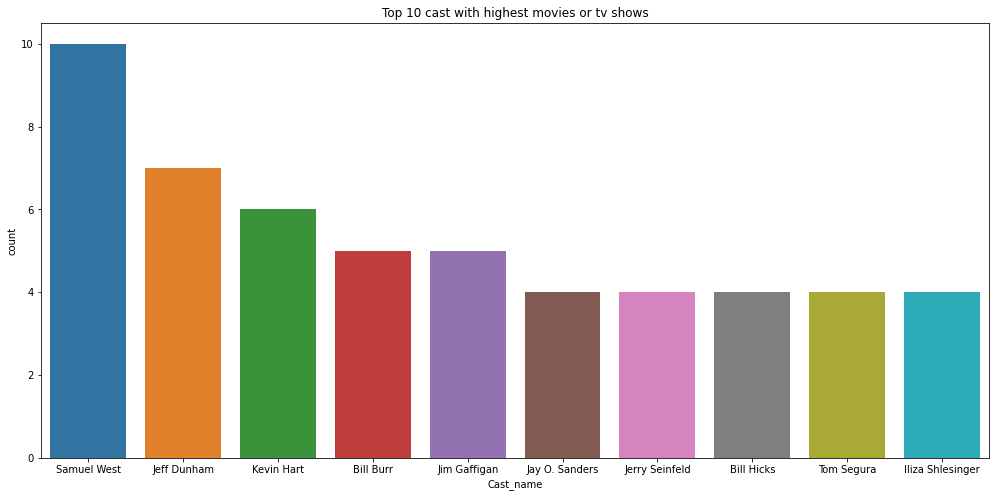

In [33]:
plt.figure(figsize=(17,8))
plt.title('Top 10 cast with highest movies or tv shows')
sns.barplot(x='Cast_name',y= 'count', data=Cast_name[:10])

# **2. Understanding what type content is available in different countries**

In [34]:
m_s_groups = netflix.groupby(["title", "type", "country",]).apply(lambda df: df.date_added) #Returns Pandas Series with movie / series title and original index
m_s_groups.head(40)

title                                  type   country                                
#Alive                                 Movie  South Korea                         27      September 8, 2020
#AnneFrank - Parallel Stories          Movie  Italy                               28           July 1, 2020
#FriendButMarried                      Movie  Indonesia                           31           May 21, 2020
#FriendButMarried 2                    Movie  Indonesia                           32          June 28, 2020
#Roxy                                  Movie  Canada                              34         April 10, 2019
#Selfie                                Movie  Romania                             36           June 1, 2019
#Selfie 69                             Movie  Romania                             37           June 1, 2019
#realityhigh                           Movie  United States                       33      September 8, 2017
1 Chance 2 Dance                       Movie  Unit